<h2 style="color:blue" align="center">Handwritten digits classification using CNN</h2>

In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

**Deep learning pipeline:** 
    
get data
split data 
normalize our data ( if needed )

x = all the data except classColumn 
y = target ( class)

create model  ( linear regression , logistic , svm )
fit our data in model ( training )
calculate accuracy ( training , testing )


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
28*28

784

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train[0].shape

(28, 28)

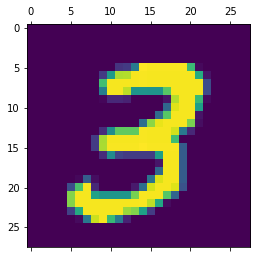

In [12]:
plt.matshow(X_train[7])

In [8]:
y_train[7]

3

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**normalize our data**

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train.shape
# 60000 * 784 

(60000, 28, 28)

In [9]:
normal neural network : 
input : x [ rows, columns ]
CNN: 
input : image ( of the same dimensions)

SyntaxError: invalid syntax (<ipython-input-9-549a73efe230>, line 1)

<h3 style='color:purple'>Using ANN for classification</h3>

In [13]:
#sequentail --> layer after layer ( organized , systematic ,static )
# Other types : functional 

# neural network takes the input as 1 dimension ( 1d array )
# images: 2D array 

# first step when training imaes on normal network --> flatten ( convert any N Dimension array into 1D array )
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


# why 10 in the last layer? 10 classes ( 0 : 9 )

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 2s 812us/step - loss: 0.2893 - accuracy: 0.9205
Epoch 2/8
1875/1875 [==============================] - 1s 689us/step - loss: 0.1367 - accuracy: 0.9601
Epoch 3/8
1875/1875 [==============================] - 1s 630us/step - loss: 0.0978 - accuracy: 0.9717
Epoch 4/8
1875/1875 [==============================] - 1s 634us/step - loss: 0.0742 - accuracy: 0.9781
Epoch 5/8
1875/1875 [==============================] - 1s 631us/step - loss: 0.0591 - accuracy: 0.9821
Epoch 6/8
1875/1875 [==============================] - 1s 635us/step - loss: 0.0480 - accuracy: 0.9854
Epoch 7/8
1875/1875 [==============================] - 1s 627us/step - loss: 0.0413 - accuracy: 0.9872
Epoch 8/8
1875/1875 [==============================] - 1s 637us/step - loss: 0.0334 - accuracy: 0.9899


when to have overfitting? 

1- training accuracy is so much bigger than testing accuracy <br>
2- training or testing accuracy is 100% <br>

In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 460us/step - loss: 0.0819 - accuracy: 0.9769


[0.08186033368110657, 0.9768999814987183]

In [15]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [16]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

<h3 style='color:purple'>Using CNN for classification</h3>

In [17]:
model = keras.Sequential([
    # conv2D is the layer that applies the filters on data
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28,1)),
    # result = 30 image : 26*26
    layers.MaxPooling2D((2,2)),
    #pooling : 2*2 = 4 , take 1 , leave 3 (3/4)
    #pooling : 3*3 = 9 , take 1 , leave 8 (8/9)
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1798 - accuracy: 0.9467
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0641 - accuracy: 0.9803
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0444 - accuracy: 0.9867
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0318 - accuracy: 0.9903
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0242 - accuracy: 0.9922


In [19]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0536 - accuracy: 0.9841


[0.053619977086782455, 0.9840999841690063]